# Importing libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense 


# Loading the dataset

In [43]:
data = pd.read_csv("RELIANCE.NS.csv")

In [44]:
print(data.head(10))
print(data.tail(10))

         Date         Open         High          Low        Close  \
0  2018-10-01  1245.890259  1245.890259  1192.694458  1220.134399   
1  2018-10-03  1217.954956  1227.960205  1188.781494  1193.784180   
2  2018-10-04  1178.330566  1179.222168  1095.614624  1111.712036   
3  2018-10-05  1089.175659  1104.827393  1028.401733  1039.001343   
4  2018-10-08  1040.140503  1106.511353  1015.920105  1098.982788   
5  2018-10-09  1111.117676  1112.752197  1071.047485  1079.814453   
6  2018-10-10  1083.628296  1105.372192  1074.118408  1091.751343   
7  2018-10-11  1054.009033  1104.282471  1033.206299  1077.585571   
8  2018-10-12  1094.574585  1118.398682  1091.553223  1115.971680   
9  2018-10-15  1119.290283  1136.130615  1107.650635  1129.047729   

     Adj Close    Volume  
0  1197.153320   7402199  
1  1171.299316   7446497  
2  1090.773071  23432473  
3  1019.431885  22151189  
4  1078.283447  24913364  
5  1059.476440  11095381  
6  1071.188354   9592247  
7  1057.289307  13349523

# Cleaning the Data

In [45]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date', ascending=True)
data = data[['Date', 'Close']] 


In [46]:
data.describe

<bound method NDFrame.describe of            Date        Close
0    2018-10-01  1220.134399
1    2018-10-03  1193.784180
2    2018-10-04  1111.712036
3    2018-10-05  1039.001343
4    2018-10-08  1098.982788
...         ...          ...
1230 2023-09-22  2354.949951
1231 2023-09-25  2340.449951
1232 2023-09-26  2342.500000
1233 2023-09-27  2368.899902
1234 2023-09-28  2334.100098

[1235 rows x 2 columns]>

In [47]:
data.columns

Index(['Date', 'Close'], dtype='object')

In [48]:
print(data.head())
print(data.tail())

        Date        Close
0 2018-10-01  1220.134399
1 2018-10-03  1193.784180
2 2018-10-04  1111.712036
3 2018-10-05  1039.001343
4 2018-10-08  1098.982788
           Date        Close
1230 2023-09-22  2354.949951
1231 2023-09-25  2340.449951
1232 2023-09-26  2342.500000
1233 2023-09-27  2368.899902
1234 2023-09-28  2334.100098


# Normalize the 'Close' prices

In [49]:
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))



# Split data into train and test sets


In [50]:
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]
print(train_data)
print(test_data)


          Date     Close
0   2018-10-01  0.175162
1   2018-10-03  0.161759
2   2018-10-04  0.120016
3   2018-10-05  0.083034
4   2018-10-08  0.113541
..         ...       ...
983 2022-09-23  0.795356
984 2022-09-26  0.763746
985 2022-09-27  0.773359
986 2022-09-28  0.740908
987 2022-09-29  0.737272

[988 rows x 2 columns]
           Date     Close
988  2022-09-30  0.763949
989  2022-10-03  0.759753
990  2022-10-04  0.781980
991  2022-10-06  0.786506
992  2022-10-07  0.791720
...         ...       ...
1230 2023-09-22  0.752352
1231 2023-09-25  0.744977
1232 2023-09-26  0.746020
1233 2023-09-27  0.759448
1234 2023-09-28  0.741748

[247 rows x 2 columns]


# Create sequences and labels for training and testing


In [51]:
# Function to create sequences and labels
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data['Close'].values[i:i+seq_length]
        label = data['Close'].values[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Define sequence length
seq_length = 10 


X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)
print(X_train,y_train,X_test,y_test)



[[0.17516169 0.16175942 0.12001582 ... 0.10265839 0.12218236 0.12883311]
 [0.16175942 0.12001582 0.08303365 ... 0.12218236 0.12883311 0.1409506 ]
 [0.12001582 0.08303365 0.11354146 ... 0.12883311 0.1409506  0.13465251]
 ...
 [0.88703527 0.87106463 0.85801843 ... 0.81905816 0.79535638 0.76374564]
 [0.87106463 0.85801843 0.82572101 ... 0.79535638 0.76374564 0.77335853]
 [0.85801843 0.82572101 0.82737403 ... 0.76374564 0.77335853 0.7409085 ]] [0.1409506  0.13465251 0.10946026 0.0899867  0.08598113 0.08147171
 0.07393923 0.08104343 0.10265839 0.08713999 0.08928133 0.08676206
 0.09615876 0.10391802 0.11087107 0.11419642 0.1055051  0.09872837
 0.1085282  0.10777241 0.10721816 0.12261064 0.13399755 0.1276491
 0.11530487 0.11024126 0.11371779 0.12301371 0.13533274 0.14331868
 0.14283999 0.13724733 0.13515635 0.13659231 0.12072119 0.12583528
 0.10389281 0.10757088 0.11409565 0.11235739 0.11495221 0.12387027
 0.12714526 0.1273468  0.12313969 0.10890607 0.10333856 0.10797395
 0.11898293 0.1216785

# Reshape the data for LSTM


In [52]:
X_train = X_train.reshape(X_train.shape[0], seq_length, 1)
X_test = X_test.reshape(X_test.shape[0], seq_length, 1)

print(X_train.shape)
print(X_test.shape)

(978, 10, 1)
(237, 10, 1)


# Build and train the LSTM model


In [53]:
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)



Epoch 1/50
31/31 [==============================] - 2s 9ms/step - loss: 0.0272
Epoch 2/50
31/31 [==============================] - 0s 11ms/step - loss: 0.0021
Epoch 3/50
31/31 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 4/50
31/31 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 5/50
31/31 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 6/50
31/31 [==============================] - 1s 36ms/step - loss: 0.0011
Epoch 7/50
31/31 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 8/50
31/31 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 9/50
31/31 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 10/50
31/31 [==============================] - 0s 11ms/step - loss: 0.0010
Epoch 11/50
31/31 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 12/50
31/31 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 13/50
31/31 [===================



# Make predictions


In [54]:

y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))



8/8 [==============================] - 1s 5ms/step



# Calculating RMSE


In [55]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")



Root Mean Squared Error: 43.540721651050774


# Plot the true vs. predicted prices


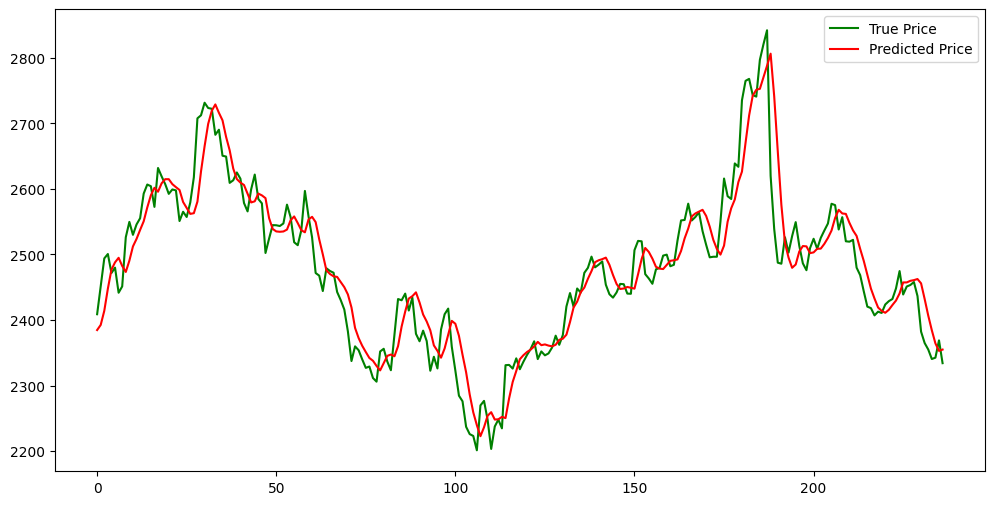

In [56]:

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Price', color='green')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.legend()
plt.show()